# Application prédiction du statut vital lié au cancer

L’objectif de cette application est de prédire le statut vital d’un patient diagnostiqué avec un cancer en fonction de plusieurs facteurs tels que l’âge, le sexe, le type de cancer et l’ethnie. Si le patient est décédé, le modèle déterminera si la cause du décès est liée au cancer ou à une autre cause.

# Résumé du Processus de Machine Learning pour la Prédiction du Statut Vital

##### 1. Importation et Préparation des Données
- Chargement du fichier `final_cancerSEER.csv` avec Pandas.
- Vérification des données (valeurs nulles, types des colonnes).
- Nettoyage des valeurs et suppression des colonnes non pertinentes.

##### 2. Transformation et Normalisation des Données
- Encodage des variables catégoriques (`Sex`, `Type`, `Race`) avec Label Encoding et One-Hot Encoding.
- Normalisation des variables numériques avec StandardScaler et MinMaxScaler.
- Séparation des données en X (variables explicatives) et Y (cible `LifeStatus`).
- Découpage en ensemble d’entraînement (80 %) et ensemble de test (20 %).

##### 3. Entraînement et Comparaison des Modèles
Différents modèles de classification ont été testés :
- Régression Logistique
- Random Forest
- Gradient Boosting
- MLPClassifier (Réseau de Neurones)
- XGBoost
- LightGBM
- TensorFlow

##### 4. Stacking des Meilleurs Modèles
- Random Forest, Gradient Boosting et LightGBM ont été combinés dans un modèle de Stacking pour tenter d'améliorer les performances.

##### 5. Optimisation avec FLAML
- FLAML a été utilisé pour trouver le meilleur modèle avec ses hyperparamètres.
- XGBoost s’est révélé être le modèle le plus performant.

##### 6. Exportation du Meilleur Modèle
- XGBoost optimisé avec FLAML a été retenu comme modèle final et sauvegardé pour une utilisation future.


# II - Importation des données dans un DataFrame Pandas

📌 Les données sont chargées dans un DataFrame Pandas pour être manipulées plus facilement.

In [1]:
#importer la librairie Pandas
import pandas as pd

df = pd.read_csv('/Users/tayebmohammedi/PycharmProjects/FastAPIProject/final_cancerSEER.csv', sep=',')

# afficher les dimensions de la table des données (propriété shape)
print("Dimensions du dataset :", df.shape)

# afficher la liste des colonnes
print("\nListe des colonnes :", df.columns)

# afficher la liste des colonnes et leurs types (propriété dtypes)
print("\nTypes des colonnes :\n", df.dtypes)

# afficher les 10 premières lignes
print("\nLes 10 premières lignes :")
print(df.head(10))

Dimensions du dataset : (1016056, 5)

Liste des colonnes : Index(['Age', 'Sex', 'Type', 'Lifestatus', 'Race'], dtype='object')

Types des colonnes :
 Age            int64
Sex           object
Type          object
Lifestatus    object
Race          object
dtype: object

Les 10 premières lignes :
   Age     Sex        Type Lifestatus      Race
0   39  Female  Colorectal      Alive  Hispanic
1   90    Male    Melanome       Dead     White
2   70  Female        Sein       Dead     Black
3   70  Female        Sein      Alive     White
4   73    Male    Prostate      Alive     White
5   66    Male    Prostate       Dead     White
6   54  Female        Sein      Alive     White
7   44  Female        Sein       Dead     White
8   82  Female        Sein      Alive     White
9   82  Female  Colorectal       Dead     White


# III - Préparation des données d'apprentissage

📌 Avant l'entraînement du modèle, il est essentiel de préparer les données : vérifier leur qualité, gérer les valeurs manquantes et transformer les variables.

## 1 - Vérification des données

📌 On commence par explorer les données en vérifiant la présence de valeurs nulles et en observant des statistiques descriptives.

In [2]:
# Vérification des valeurs manquantes
# Vérification des valeurs nulles
print("Nombre de valeurs nulles par colonne :")
print(df.isnull().sum())

# Description statistique des données
print("\nDescription statistique des données numériques :")
print(df.describe())

# Description des colonnes non numériques (catégoriques)
print("\nDescription des données catégoriques :")
print(df.describe(include=['O']))  # 'O' pour object, soit les colonnes de type string/catégorique



Nombre de valeurs nulles par colonne :
Age           0
Sex           0
Type          0
Lifestatus    0
Race          0
dtype: int64

Description statistique des données numériques :
                Age
count  1.016056e+06
mean   6.597594e+01
std    1.302650e+01
min    0.000000e+00
25%    5.800000e+01
50%    6.700000e+01
75%    7.500000e+01
max    9.000000e+01

Description des données catégoriques :
            Sex     Type Lifestatus     Race
count   1016056  1016056    1016056  1016056
unique        2        6          2        5
top      Female     Sein      Alive    White
freq     514810   280439     624808   757963


## 2 - Transformation des données

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encodage de la colonne "Sex"
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"]) #(Male=1, Female=0)


# Encodage de la variable cible "Lifestatus" (Alive = 0, Dead = 1)
le_cod = LabelEncoder()
df["Lifestatus"] = le_cod.fit_transform(df["Lifestatus"])

# Encodage des variables catégorielles "Type" et "Race" en One-Hot Encoding
df = pd.get_dummies(df, columns=["Type", "Race"], drop_first=False)

# Afficher les 10 premières lignes
print("\nLes 10 premières lignes :")
print(df.head(10))

# Afficher les 10 dernières lignes
print("\nLes 10 dernières lignes :")
print(df.tail(10))

# Afficher la liste des colonnes et leurs nouveaux types
print("\nListe des colonnes et leurs types après transformation :")
print(df.dtypes)



Les 10 premières lignes :
   Age  Sex  Lifestatus  Type_Melanome  Type_Pancreas  Type_Poumons  \
0   39    0           0          False          False         False   
1   90    1           1           True          False         False   
2   70    0           1          False          False         False   
3   70    0           0          False          False         False   
4   73    1           0          False          False         False   
5   66    1           1          False          False         False   
6   54    0           0          False          False         False   
7   44    0           1          False          False         False   
8   82    0           0          False          False         False   
9   82    0           1          False          False         False   

   Type_Prostate  Type_Sein  Race_Black  Race_Hispanic  Race_Native American  \
0          False      False       False           True                 False   
1          False      False    

## 3 - Séparation des données en variables d'entrée (X) et variable cible (y)

In [4]:
# Définition des variables X et y
X = df.drop(columns=["Lifestatus"])  # Variables explicatives
y = df["Lifestatus"]  # Variable cible

# Affichage des dimensions des ensembles X et y
print(f"Dimensions de X: {X.shape}")
print(f"Dimensions de y: {y.shape}")


Dimensions de X: (1016056, 11)
Dimensions de y: (1016056,)


AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

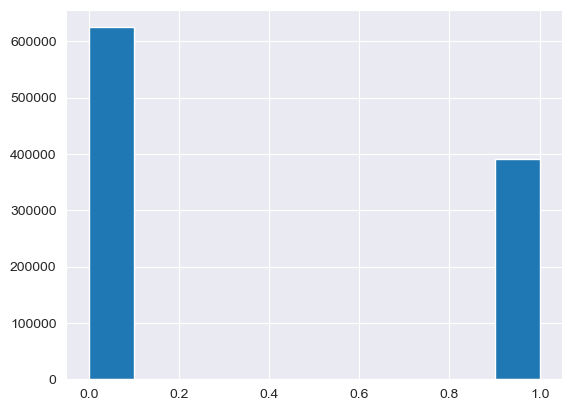

In [25]:
y.hist(bin=2)

## 4 - Normalisation des données (Scaling)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialisation du scaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display scaled features
X.head()


,Age,Sex,Type_Melanome,Type_Pancreas,Type_Poumons,Type_Prostate,Type_Sein,Race_Black,Race_Hispanic,Race_Native American,Race_White
0,0.433333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.777778,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.777778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.811111,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## 5 - Découpage des données en ensembles d'entraînement et de test

In [6]:
from sklearn.model_selection import train_test_split

# Fractionnement en 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Affichage des dimensions des ensembles après découpage
print(f"Ensemble d'entraînement: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Ensemble de test: X_test={X_test.shape}, y_test={y_test.shape}")


Ensemble d'entraînement: X_train=(812844, 11), y_train=(812844,)
Ensemble de test: X_test=(203212, 11), y_test=(203212,)


# IV - Classification avec différents modèles

Nous allons appliquer plusieurs modèles de classification :


*   Forêt aléatoire (RandomForestClassifier)
*   Régression logistique (LogisticRegression)
*   Gradient Boosting (GradientBoostingClassifier)
*   MLP Classifier



In [3]:
# Importation des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

# IV - Définition des modèles
models = {
    "Régression Logistique": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=42, max_samples=0.5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, alpha=0.001, random_state=42)
}

# 📌 Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

# 📌 Fonction pour évaluer les performances du modèle
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensibilité
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Score AUC

    print(f"\n🔹 {model_name} Performance:")
    print(f"  - Accuracy  : {accuracy:.3f}")
    print(f"  - Recall    : {recall:.3f}")
    print(f"  - AUC Score : {auc:.3f}\n")

    return accuracy, recall, auc

# 📌 Dictionnaire pour stocker les résultats
model_results = {}

# 📌 Initialisation de la courbe ROC
plt.figure(figsize=(8, 6))

# 📌 Entraînement et évaluation des modèles
for name, model in models.items():
    print(f"\n=== Entraînement de {name} ===")

    # ⏳ Mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    print(f"✅ {name} entraîné en {elapsed_time:.2f} secondes.")

    # 📌 Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # 📌 Évaluation des performances
    model_results[name] = evaluate_model(y_test, y_pred, y_pred_proba, name)

    # 📌 Affichage de la matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # 📌 Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba[:, 1]):.3f})")

    import matplotlib.pyplot as plt

# Get feature importance
importances = model.feature_importances_

print(importances)


# 📌 Finalisation de la courbe ROC
plt.plot([0, 1], [0, 1], 'k--')  # Ligne de référence
plt.xlabel("Faux Positifs (FPR)")
plt.ylabel("Vrais Positifs (TPR)")
plt.title("Courbe ROC - Comparaison des Modèles")
plt.legend()
plt.show()

# 📌 Comparaison des résultats sous forme de tableau
result_df = pd.DataFrame.from_dict(model_results, orient='index', columns=["Accuracy", "Recall", "AUC"])
print("\n📊 Comparaison des scores des modèles :")
print(result_df)


ModuleNotFoundError: No module named 'sklearn'

## Cross validation

In [12]:
# 📌 Import required libraries
from sklearn.model_selection import cross_val_score
import numpy as np

# 📌 Define models for cross-validation
models = {
    "Régression Logistique": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, alpha=0.001, random_state=42)
}

# 📌 Perform 5-Fold Cross-Validation
cv_results = {}

for name, model in models.items():
    print(f"\n=== Cross-Validating {name} ===")

    # Compute cross-validation scores
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy", n_jobs=-1)

    # Store the mean and standard deviation
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }

    print(f"Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# 📌 Convert results to a DataFrame for better visualization
cv_results_df = pd.DataFrame.from_dict(cv_results, orient="index")

# 📌 Display cross-validation results
print("\n📊 Cross-Validation Results:")
print(cv_results_df)



=== Cross-Validating Régression Logistique ===
Mean Accuracy: 0.7719 ± 0.0046

=== Cross-Validating Random Forest ===
Mean Accuracy: 0.7828 ± 0.0051

=== Cross-Validating Gradient Boosting ===
Mean Accuracy: 0.7835 ± 0.0050

=== Cross-Validating MLP Classifier ===
Mean Accuracy: 0.7830 ± 0.0049

📊 Cross-Validation Results:
                       Mean Accuracy   Std Dev
Régression Logistique       0.771881  0.004579
Random Forest               0.782790  0.005100
Gradient Boosting           0.783480  0.005006
MLP Classifier              0.782990  0.004922


In [10]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5]
}

random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Only test 20 random combinations instead of all 81
    cv=3,  # Reduce cross-validation folds to 3
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train, y_train)


# Best parameters
print("Best parameters:", random_search.best_params_)

# Evaluate with best parameters
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/tayebmohammedi/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.80      0.86      0.83    124962
           1       0.74      0.67      0.70     78250

    accuracy                           0.78    203212
   macro avg       0.77      0.76      0.77    203212
weighted avg       0.78      0.78      0.78    203212



### XGBoost


=== Training XGBoost ===


/Users/tayebmohammedi/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:42:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Performance ===
Accuracy: 0.7835
AUC Score: 0.8319

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83    124962
           1       0.74      0.67      0.70     78250

    accuracy                           0.78    203212
   macro avg       0.77      0.76      0.77    203212
weighted avg       0.78      0.78      0.78    203212



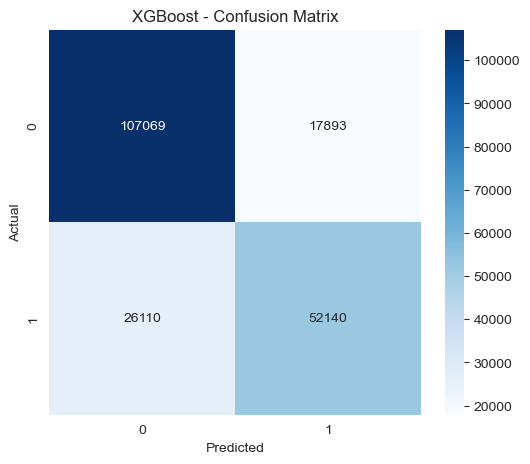

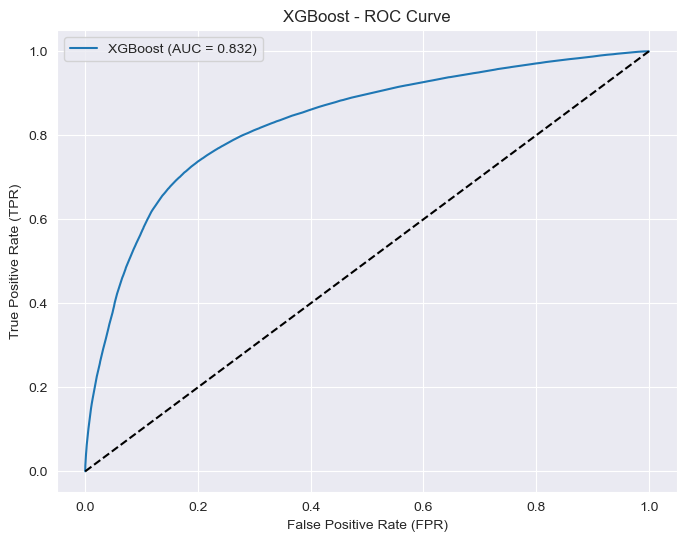


=== XGBoost with Adjusted Threshold (0.4) ===
              precision    recall  f1-score   support

           0       0.82      0.81      0.82    124962
           1       0.71      0.72      0.72     78250

    accuracy                           0.78    203212
   macro avg       0.77      0.77      0.77    203212
weighted avg       0.78      0.78      0.78    203212



In [11]:
# 📌 Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Define XGBoost model with best parameters found in GridSearchCV
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# 📌 Train the model
print("\n=== Training XGBoost ===")
xgb.fit(X_train, y_train)

# 📌 Predict using the model
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Get probabilities for "Dead" class

# 📌 Evaluation Metrics
print("\n=== XGBoost Performance ===")
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📌 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# 📌 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')  # Reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.show()

# 📌 Adjusting Decision Threshold to Improve Recall
threshold = 0.4  # Change decision threshold from 0.5 to 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("\n=== XGBoost with Adjusted Threshold (0.4) ===")
print(classification_report(y_test, y_pred_adjusted))


## LightGBM

In [14]:
# Initialisation du modèle LightGBM
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ Initialize LightGBM Model
lgbm = LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# ✅ Train LightGBM Model
lgbm.fit(X_train, y_train)

# ✅ Predictions
y_pred_lgbm = lgbm.predict(X_test)

# ✅ Evaluate Performance
print("\n=== LightGBM Model Performance ===")
print(classification_report(y_test, y_pred_lgbm))

y_pred_proba = lgbm.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
print("\n=== LightGBM with Adjusted Threshold (0.4) ===")
print(classification_report(y_test, y_pred_adjusted))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 312998, number of negative: 499846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 812844, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385065 -> initscore=-0.468103
[LightGBM] [Info] Start training from score -0.468103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

## Optimized LightGBM

In [18]:
# Initialisation du modèle LightGBM
from lightgbm import LGBMClassifier

# ✅ Increase `n_estimators`, decrease `max_depth`, and use regularization
lgbm_tuned = LGBMClassifier(
    n_estimators=500,  # More trees
    max_depth=3,  # Reduce overfitting
    learning_rate=0.05,  # Slower learning for better convergence
    num_leaves=20,  # More flexibility in tree splits
    min_data_in_leaf=30,  # Prevent small leaf nodes
    random_state=42
)

# ✅ Train LightGBM
lgbm_tuned.fit(X_train, y_train)

# ✅ Predictions
y_pred_lgbm_tuned = lgbm_tuned.predict(X_test)

# ✅ Evaluate
print("\n=== LightGBM (Tuned) Performance ===")
print(classification_report(y_test, y_pred_lgbm_tuned))


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 312998, number of negative: 499846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 812844, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385065 -> initscore=-0.468103
[LightGBM] [Info] Start training from score -0.468103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

## Stacking Code

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# ✅ Define Base Models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, alpha=0.001, random_state=42))
]

# ✅ Define Meta-Model (Final Decision Maker)
meta_model = LogisticRegression()

# ✅ Initialize Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# ✅ Train Stacking Model
stacking_model.fit(X_train, y_train)

# ✅ Predictions
y_pred_stacking = stacking_model.predict(X_test)

# ✅ Evaluate Performance
print("\n=== Stacking Model Performance ===")
print(classification_report(y_test, y_pred_stacking))



=== Stacking Model Performance ===
              precision    recall  f1-score   support

           0       0.80      0.86      0.83    124962
           1       0.75      0.66      0.70     78250

    accuracy                           0.78    203212
   macro avg       0.77      0.76      0.77    203212
weighted avg       0.78      0.78      0.78    203212



## TensorFlow

In [13]:
import sys
sys.setrecursionlimit(5000)  # Increase recursion depth to avoid error
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to use CPU
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  # Disable oneDNN optimizations (fixes recursion issues)

import tensorflow as tf
from tensorflow import keras
from keras import layers, models

# ✅ Define a smaller, optimized Neural Network
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# ✅ Compile Model with `run_eagerly=True`
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"], run_eagerly=True)

# ✅ Train Model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n=== Neural Network Test Accuracy: {test_acc:.4f} ===")



/Users/tayebmohammedi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-06 00:48:42.096138: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-02-06 00:48:42.096308: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-02-06 00:48:42.096326: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-02-06 00:48:42.096588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-06 00:48:42.096612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Epoch 1/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 259s 20ms/step - accuracy: 0.7710 - loss: 0.5011 - val_accuracy: 0.7816 - val_loss: 0.4877
Epoch 2/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 272s 21ms/step - accuracy: 0.7828 - loss: 0.4869 - val_accuracy: 0.7827 - val_loss: 0.4863
Epoch 3/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 261s 21ms/step - accuracy: 0.7834 - loss: 0.4857 - val_accuracy: 0.7827 - val_loss: 0.4874
Epoch 4/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 259s 20ms/step - accuracy: 0.7834 - loss: 0.4850 - val_accuracy: 0.7833 - val_loss: 0.4856
Epoch 5/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 260s 20ms/step - accuracy: 0.7836 - loss: 0.4852 - val_accuracy: 0.7826 - val_loss: 0.4862
Epoch 6/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 260s 20ms/step - accuracy: 0.7822 - loss: 0.4866 - val_accuracy: 0.7834 - val_loss: 0.4850
Epoch 7/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 261s 21ms/step - accuracy: 0.7831 - loss: 0.4857 - val_accuracy: 0.7832 - val_loss: 0.4859
Epoch 8/20
12701/12701 ━━━━━━━━━━━━━━━━━━━━ 261s 21ms/s

### Stacking with lightGM XGBoost qnd RandomForest

In [17]:
# Initialisation du modèle LightGBM
# 📌 Import Required Libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 📌 Define Base Models
base_models = [
    ('lgbm', LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# 📌 Define Meta-Model (Final Decision Maker)
meta_model = LogisticRegression()

# 📌 Initialize Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# ✅ Train Stacking Model
stacking_model.fit(X_train, y_train)

# ✅ Predictions
y_pred_stacking = stacking_model.predict(X_test)

# ✅ Evaluate Performance
print("\n=== Stacking Model Performance ===")
print(classification_report(y_test, y_pred_stacking))

# ✅ Adjust Decision Threshold for Higher Recall
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("\n=== Stacking Model with Adjusted Threshold (0.4) ===")
print(classification_report(y_test, y_pred_adjusted))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250398, number of negative: 399877
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250399, number of negative: 399877
[LightGBM] [Info] Number of positive: 250398, number of negative: 399877
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250399, number of negative: 399876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of data points in the tr

## Optimizing gradientboost, light and random

In [18]:
# Initialisation du modèle LightGBM
# 📌 Import Required Libraries
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# ✅ Define Parameter Distributions (Wider Range)
rf_param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gb_param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": [2, 5, 10]
}

lgbm_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "num_leaves": [20, 31, 50]
}

# ✅ Define Models
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), rf_param_dist),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), gb_param_dist),
    "LightGBM": (LGBMClassifier(random_state=42), lgbm_param_dist)
}

# ✅ Perform Randomized Search CV for Each Model
best_models = {}

for name, (model, param_dist) in models.items():
    print(f"\n🔹 Running RandomizedSearchCV for {name}...")

    start_time = time.time()

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring="accuracy",
        cv=3,  # 3-Fold Cross Validation
        n_iter=20,  # Try 20 random combinations
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    end_time = time.time()

    # ✅ Store Best Model
    best_models[name] = random_search.best_estimator_

    # ✅ Print Best Parameters & Score
    print(f"\n✅ Best Parameters for {name}: {random_search.best_params_}")
    print(f"✅ Best Accuracy: {random_search.best_score_:.4f}")
    print(f"🕒 Time Taken: {end_time - start_time:.2f} seconds")

# ✅ Evaluate Best Models on Test Data
for name, model in best_models.items():
    print(f"\n=== Evaluating {name} on Test Set ===")

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))



🔹 Running RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
✅ Best Accuracy: 0.7836
🕒 Time Taken: 520.41 seconds

🔹 Running RandomizedSearchCV for Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Best Parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.1}
✅ Best Accuracy: 0.7839
🕒 Time Taken: 1233.05 seconds

🔹 Running RandomizedSearchCV for LightGBM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.5min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  24.4s
[CV] 

## Stack lgbm, gradientboost and randomsearch forest

In [19]:
# 📌 Import Required Libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### **🔹 Option 1: Lower Decision Threshold to 0.3 for Higher Recall**
print("\n=== LightGBM with Adjusted Threshold (0.3) ===")

# Get prediction probabilities from best LightGBM model
y_pred_proba = best_models["LightGBM"].predict_proba(X_test)[:, 1]

# Lower threshold to 0.3
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate new predictions
print(classification_report(y_test, y_pred_adjusted))


### **🔹 Option 2: Stacking Best Models Together**
print("\n🔹 Training Stacking Model...")

# Stacking with the best optimized models
stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_models["Random Forest"]),
        ('gb', best_models["Gradient Boosting"]),
        ('lgbm', best_models["LightGBM"])
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# Train Stacking Model
stacking_model.fit(X_train, y_train)

# Predict & Evaluate Stacking Model
y_pred_stacking = stacking_model.predict(X_test)

print("\n=== Stacking Model Performance ===")
print(classification_report(y_test, y_pred_stacking))

### **🔹 Option 3: Apply Lower Threshold (0.3) to Stacking Model**
print("\n=== Stacking Model with Adjusted Threshold (0.3) ===")

# Get prediction probabilities from stacking model
y_pred_proba_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Apply threshold of 0.3
y_pred_stacking_adjusted = (y_pred_proba_stacking >= threshold).astype(int)

# Evaluate stacking model with new threshold
print(classification_report(y_test, y_pred_stacking_adjusted))



=== LightGBM with Adjusted Threshold (0.3) ===
              precision    recall  f1-score   support

           0       0.85      0.73      0.79    124962
           1       0.65      0.79      0.71     78250

    accuracy                           0.76    203212
   macro avg       0.75      0.76      0.75    203212
weighted avg       0.77      0.76      0.76    203212


🔹 Training Stacking Model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250398, number of negative: 399877
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250398, number of negative: 399877
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250399, num

## FLAML

In [21]:
from flaml import AutoML
from sklearn.metrics import classification_report

# Initialize AutoML
automl = AutoML()

# Train AutoML model
automl.fit(X_train, y_train, task="classification", time_budget=600)  # 10 minutes

# Predict
y_pred_flaml = automl.predict(X_test)

# Evaluate
print("\n=== FLAML AutoML Model Performance ===")
print(classification_report(y_test, y_pred_flaml))


[flaml.automl.logger: 02-06 09:46:49] {1728} INFO - task = classification
[flaml.automl.logger: 02-06 09:46:49] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 02-06 09:46:50] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 02-06 09:46:51] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 02-06 09:46:51] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-06 09:46:51] {2393} INFO - Estimated sufficient time budget=25283s. Estimated necessary time budget=623s.
[flaml.automl.logger: 02-06 09:46:51] {2442} INFO -  at 2.1s,	estimator lgbm's best error=0.2178,	best estimator lgbm's best error=0.2178
[flaml.automl.logger: 02-06 09:46:51] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-06 09:46:51] {2442} INFO -  at 2.2s,	estimator lgbm's best error=0.2039,	best estimator lgbm's best error=0.2039
[flaml.au